In [33]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 指定字体
font = FontProperties(fname=r'C:\WINDOWS\Fonts\simhei.ttf')  # 请根据你的系统和字体路径修改

In [2]:
file_path = r'G:\data\Zephyr中国海外并购数据库\workfile.xlsx'
data = pd.read_excel(file_path)
#print(data.head())

In [3]:
# 打印变量名称及类型
for column in data.columns:
    print(f"变量名称: {column}, 类型: {data[column].dtype}")

变量名称: Unnamed: 0, 类型: float64
变量名称: Deal Number, 类型: int64
变量名称: Acquiror name, 类型: object
变量名称: Acquiror country code, 类型: object
变量名称: Target name, 类型: object
变量名称: Target country code, 类型: object
变量名称: Deal type, 类型: object
变量名称: Deal status, 类型: object
变量名称: Deal value th EUR, 类型: object
变量名称: Target business description(s), 类型: object
变量名称: Acquiror business description(s), 类型: object
变量名称: Deal type.1, 类型: object
变量名称: Deal sub-type, 类型: object
变量名称: Deal financing, 类型: object
变量名称: Deal method of payment, 类型: object
变量名称: Deal method of payment value th EUR, 类型: object
变量名称: Deal status.1, 类型: object
变量名称: Rumour date, 类型: datetime64[ns]
变量名称: Announced date, 类型: datetime64[ns]
变量名称: Expected completion date, 类型: datetime64[ns]
变量名称: Assumed completion date, 类型: datetime64[ns]
变量名称: Completed date, 类型: datetime64[ns]
变量名称: Postponed date, 类型: datetime64[ns]
变量名称: Withdrawn  date, 类型: datetime64[ns]
变量名称: Last deal status date, 类型: datetime64[ns]
变量名称: Last deal value, offer pric

In [4]:
# 提取“Acquiror country code”列并统计每个类别的出现次数
acquiror_country_code_counts = data['Acquiror country code'].value_counts()

# 打印结果
print("Acquiror country code 变量下有几类字符，分别出现了多少次：")
for code, count in acquiror_country_code_counts.items():
    print(f"字符: {code}, 出现次数: {count}")

Acquiror country code 变量下有几类字符，分别出现了多少次：
字符: CN, 出现次数: 12288
字符: US, 出现次数: 4212
字符: HK, 出现次数: 1315
字符: KY, 出现次数: 1041
字符: JP, 出现次数: 761
字符: SG, 出现次数: 616
字符: VG, 出现次数: 441
字符: GB, 出现次数: 262
字符: DE, 出现次数: 257
字符: FR, 出现次数: 230
字符: KR, 出现次数: 218
字符: TW, 出现次数: 190
字符: BM, 出现次数: 155
字符: CA, 出现次数: 136
字符: CH, 出现次数: 118
字符: AU, 出现次数: 109
字符: IL, 出现次数: 99
字符: NL, 出现次数: 89
字符: MY, 出现次数: 84
字符: IT, 出现次数: 80
字符: IN, 出现次数: 59
字符: SE, 出现次数: 45
字符: FI, 出现次数: 44
字符: BE, 出现次数: 39
字符: ES, 出现次数: 35
字符: NO, 出现次数: 29
字符: LU, 出现次数: 29
字符: TH, 出现次数: 29
字符: RU, 出现次数: 28
字符: BR, 出现次数: 27
字符: MU, 出现次数: 25
字符: DK, 出现次数: 21
字符: II, 出现次数: 19
字符: UZ, 出现次数: 15
字符: KZ, 出现次数: 14
字符: BY, 出现次数: 14
字符: CZ, 出现次数: 14
字符: WS, 出现次数: 13
字符: IE, 出现次数: 13
字符: AT, 出现次数: 13
字符: VN, 出现次数: 13
字符: SA, 出现次数: 9
字符: ID, 出现次数: 8
字符: ZA, 出现次数: 8
字符: HU, 出现次数: 8
字符: GR, 出现次数: 7
字符: MO, 出现次数: 6
字符: PT, 出现次数: 6
字符: PL, 出现次数: 6
字符: PK, 出现次数: 6
字符: AR, 出现次数: 6
字符: CL, 出现次数: 6
字符: CO, 出现次数: 5
字符: EE, 出现次数: 5
字符: ZW, 出现次数: 5
字符: EG, 出现次数: 4
字

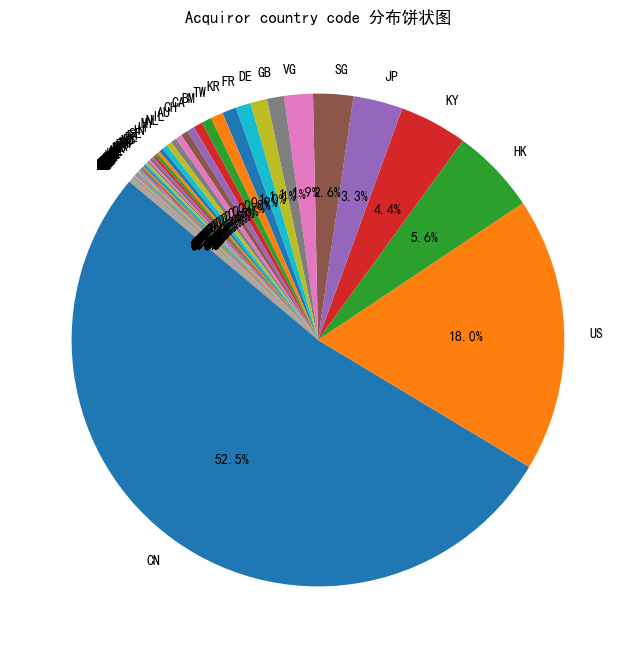

In [5]:
# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(acquiror_country_code_counts, labels=acquiror_country_code_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Acquiror country code 分布饼状图')
plt.show()

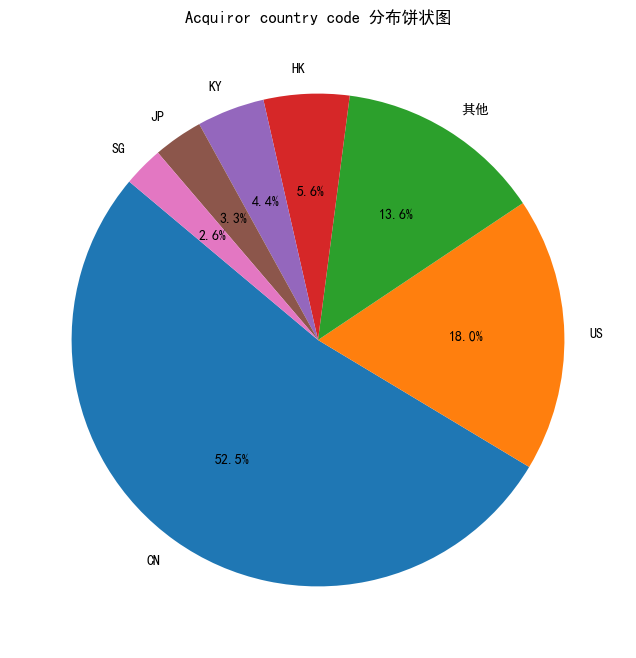

In [6]:
# 提取“Acquiror country code”列并统计每个类别的出现次数
acquiror_country_code_counts = data['Acquiror country code'].value_counts()

# 将出现次数小于2.6%的字符合并为一个类别
threshold = 0.026
other_codes = acquiror_country_code_counts[acquiror_country_code_counts / acquiror_country_code_counts.sum() < threshold].index
data['Acquiror country code'] = data['Acquiror country code'].replace(other_codes, '其他')

# 重新计算合并后的各类别出现次数
acquiror_country_code_counts = data['Acquiror country code'].value_counts()

# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(acquiror_country_code_counts, labels=acquiror_country_code_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Acquiror country code 分布饼状图')
plt.show()

In [7]:
deal_value_column = data['Deal value th EUR']
print(f"Deal value th EUR 变量的类型是：{deal_value_column.dtype}")

Deal value th EUR 变量的类型是：object


In [8]:
data['Deal value th EUR'] = pd.to_numeric(data['Deal value th EUR'], errors='coerce')
# 打印变量类型
print(f"Deal value th EUR 变量的类型是：{data['Deal value th EUR'].dtype}")

Deal value th EUR 变量的类型是：float64


In [9]:
deal_value_column = data['Rumour date']
print(f"Rumour date 变量的类型是：{deal_value_column.dtype}")

Rumour date 变量的类型是：datetime64[ns]


In [10]:
# 输出 "Rumour date" 变量的基本统计信息
rumour_date_summary = data['Rumour date'].describe(datetime_is_numeric=True)
# rumour_date_summary = data['Rumour date'].describe()

# 打印总结信息
print("Rumour date 变量的基本统计信息：")
print(rumour_date_summary)

Rumour date 变量的基本统计信息：
count                            25367
mean     2014-01-22 00:27:11.473962240
min                1995-12-31 00:00:00
25%                2011-01-11 00:00:00
50%                2015-10-27 00:00:00
75%                2017-10-05 00:00:00
max                2019-08-27 00:00:00
Name: Rumour date, dtype: object


In [11]:
# 将 "Rumour date" 和 "Acquiror country code" 列作为索引，计算 "Deal value th EUR" 列的总和
deal_value_sum_by_group = data.groupby(['Rumour date', 'Acquiror country code'])['Deal value th EUR'].sum()

# 打印结果
print("根据 Rumour date 和 Acquiror country code 计算的 Deal value th EUR 总和：")
print(deal_value_sum_by_group)

根据 Rumour date 和 Acquiror country code 计算的 Deal value th EUR 总和：
Rumour date  Acquiror country code
1995-12-31   US                             0.00
1997-02-28   CN                             0.00
1997-06-06   CN                       1043196.93
1997-06-24   CN                         12158.26
1998-02-04   其他                             0.00
                                         ...    
2019-08-24   US                             0.00
2019-08-26   CN                         25983.52
             US                             0.00
2019-08-27   CN                       1991362.14
             其他                         97825.48
Name: Deal value th EUR, Length: 8937, dtype: float64


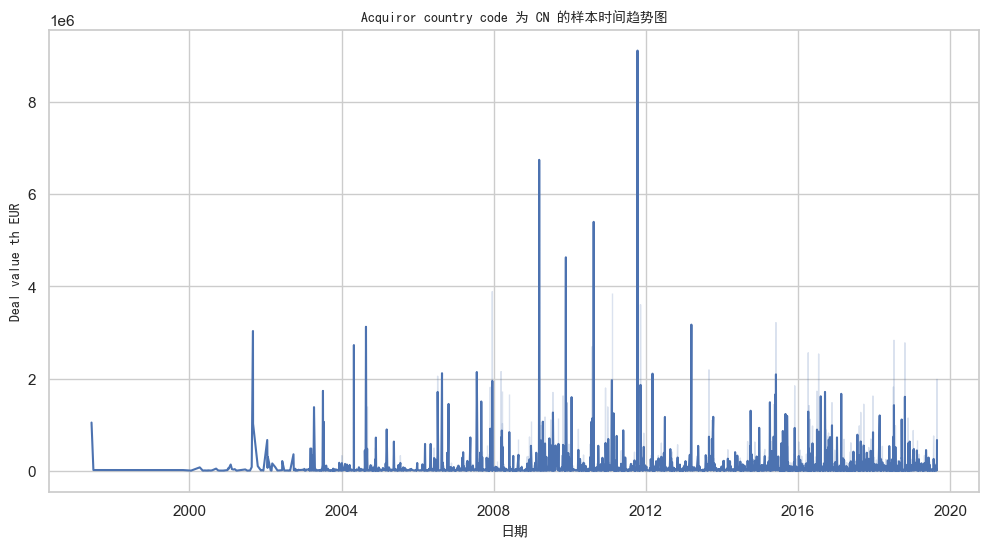

In [12]:
# 筛选出 "Acquiror country code" 为 "CN" 的样本
cn_samples = data[data['Acquiror country code'] == 'CN']

# 设置图形样式
sns.set(style="whitegrid")

# 画出时间趋势图
plt.figure(figsize=(12, 6))
sns.lineplot(x='Rumour date', y='Deal value th EUR', data=cn_samples)
plt.title('Acquiror country code 为 CN 的样本时间趋势图', fontproperties=font)
plt.xlabel('日期', fontproperties=font)
plt.ylabel('Deal value th EUR', fontproperties=font)
plt.show()

根据 Rumour date 年份和 Acquiror country code 计算的 Deal value th EUR 总和：
Rumour date  Acquiror country code
1995         US                              0.00
1997         CN                        1055355.19
1998         US                              0.00
             其他                              0.00
1999         CN                          11489.88
                                         ...     
2019         JP                        1453527.09
             KY                         135947.13
             SG                        1986665.50
             US                        4812972.23
             其他                       13771393.89
Name: Deal value th EUR, Length: 142, dtype: float64


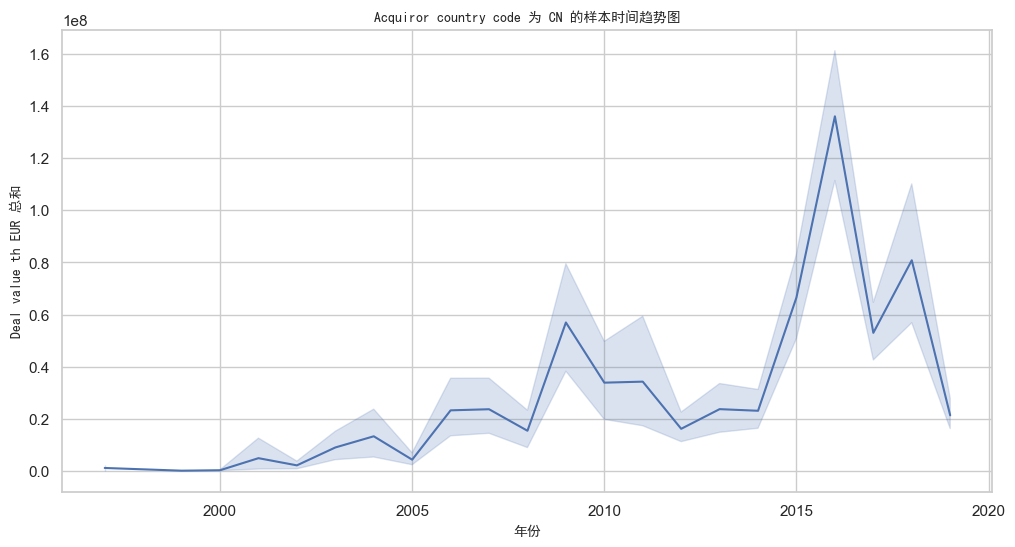

In [13]:
### tabulate ###
# 按年对 "Rumour date" 进行分组，计算 "Deal value th EUR" 列的总和
deal_value_sum_by_year = data.groupby([data['Rumour date'].dt.year, 'Acquiror country code'])['Deal value th EUR'].sum()
#日期频率: deal_value_sum_by_group = data.groupby(['Rumour date', 'Acquiror country code'])['Deal value th EUR'].sum()

# 打印结果
print("根据 Rumour date 年份和 Acquiror country code 计算的 Deal value th EUR 总和：")
print(deal_value_sum_by_year)



### 画图 ###
# 筛选出 "Acquiror country code" 为 "CN" 的样本
cn_samples = data[data['Acquiror country code'] == 'CN']

# 设置图形样式
sns.set(style="whitegrid")

# 画出 "Acquiror country code" 为 "CN" 样本的时间趋势图
plt.figure(figsize=(12, 6))
sns.lineplot(x=cn_samples['Rumour date'].dt.year, y=cn_samples['Deal value th EUR'], estimator='sum')
plt.title('Acquiror country code 为 CN 的样本时间趋势图', fontproperties=font)
plt.xlabel('年份', fontproperties=font)
plt.ylabel('Deal value th EUR 总和', fontproperties=font)
plt.show()

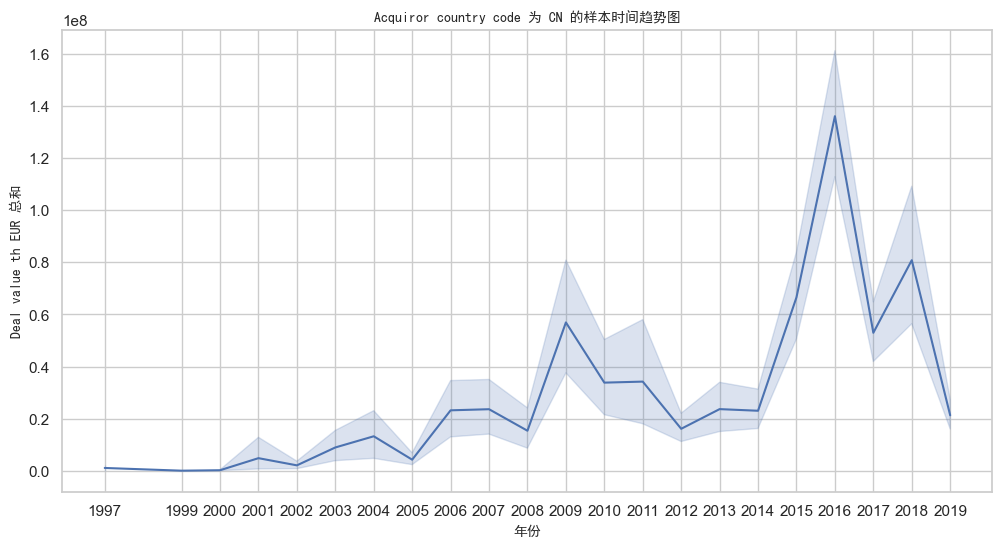

In [14]:
# 设置图形样式
sns.set(style="whitegrid")

# 画出 "Acquiror country code" 为 "CN" 样本的时间趋势图
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x=cn_samples['Rumour date'].dt.year, y=cn_samples['Deal value th EUR'], estimator='sum')
plt.title('Acquiror country code 为 CN 的样本时间趋势图', fontproperties=font)
plt.xlabel('年份', fontproperties=font)
plt.ylabel('Deal value th EUR 总和', fontproperties=font)

# 设置 x 轴刻度
years = sorted(cn_samples['Rumour date'].dt.year.unique())
plot.set_xticks(years)

plt.show()

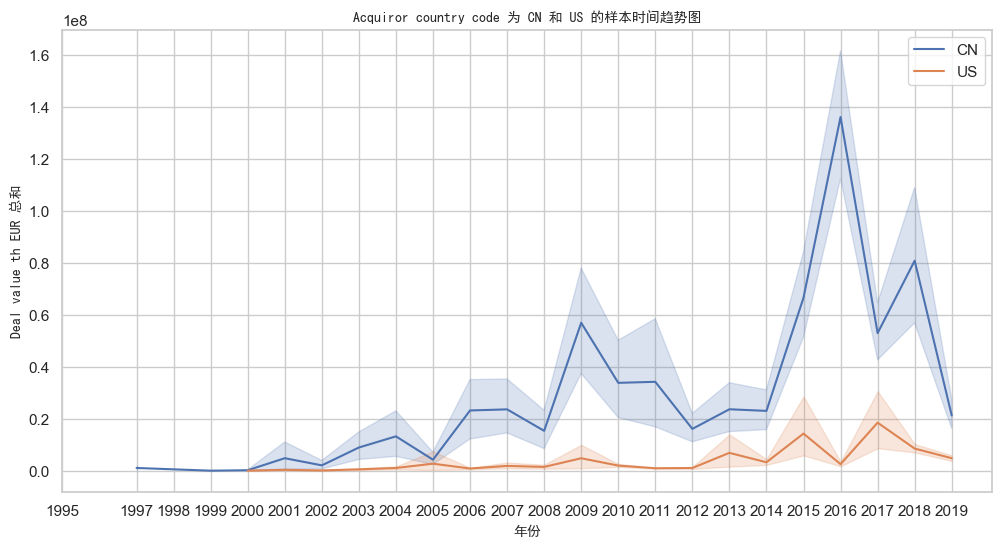

In [15]:
# 筛选出 "Acquiror country code" 为 "CN" 和 "US" 的样本
cn_samples = data[data['Acquiror country code'] == 'CN']
us_samples = data[data['Acquiror country code'] == 'US']

# 设置图形样式
sns.set(style="whitegrid")

# 画出 "Acquiror country code" 为 "CN" 和 "US" 样本的时间趋势图
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x=cn_samples['Rumour date'].dt.year, y=cn_samples['Deal value th EUR'], estimator='sum', label='CN')
sns.lineplot(x=us_samples['Rumour date'].dt.year, y=us_samples['Deal value th EUR'], estimator='sum', label='US')
plt.title('Acquiror country code 为 CN 和 US 的样本时间趋势图', fontproperties=font)
plt.xlabel('年份', fontproperties=font)
plt.ylabel('Deal value th EUR 总和', fontproperties=font)
plt.legend()

# 设置 x 轴刻度
years = sorted(data['Rumour date'].dt.year.unique())
plot.set_xticks(years)

plt.show()

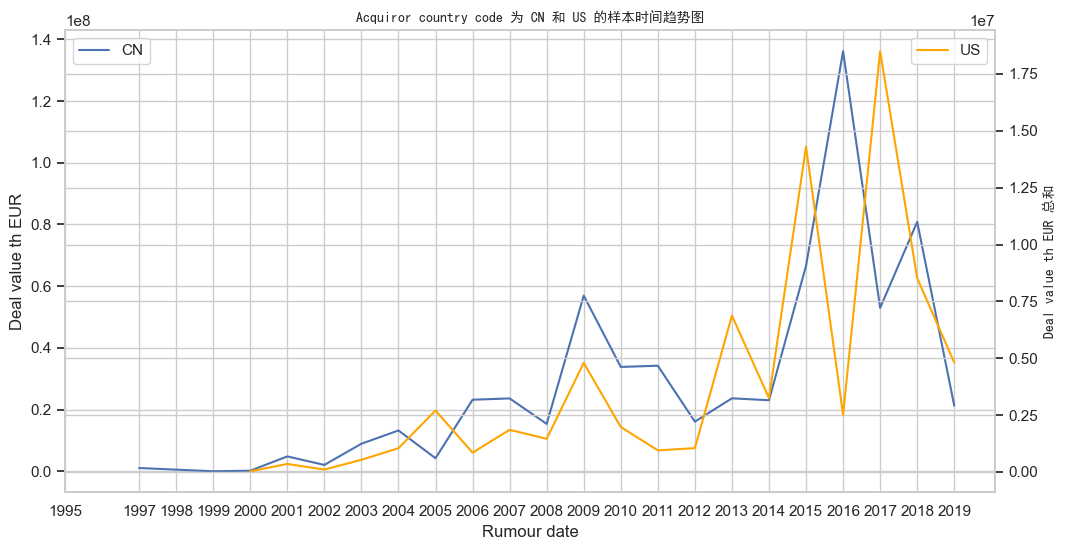

In [16]:
# 筛选出 "Acquiror country code" 为 "CN" 和 "US" 的样本
cn_samples = data[data['Acquiror country code'] == 'CN']
us_samples = data[data['Acquiror country code'] == 'US']

# 设置图形样式
sns.set(style="whitegrid")

# 画出 "Acquiror country code" 为 "CN" 样本的时间趋势图
plt.figure(figsize=(12, 6))
plot_cn = sns.lineplot(x=cn_samples['Rumour date'].dt.year, y=cn_samples['Deal value th EUR'], estimator='sum', label='CN', ci = None )

# 创建第二个纵坐标轴并画出 "Acquiror country code" 为 "US" 样本的时间趋势图
plot_us = plot_cn.twinx()
sns.lineplot(x=us_samples['Rumour date'].dt.year, y=us_samples['Deal value th EUR'], estimator='sum', color='orange', label='US', ci = None )

# 设置标题和标签
plt.title('Acquiror country code 为 CN 和 US 的样本时间趋势图', fontproperties=font)
plt.xlabel('年份', fontproperties=font)
plt.ylabel('Deal value th EUR 总和', fontproperties=font)

# 设置 x 轴刻度
years = sorted(data['Rumour date'].dt.year.unique())
plot_cn.set_xticks(years)

# 添加图例
plot_cn.legend(loc='upper left')
plot_us.legend(loc='upper right')

plt.show()

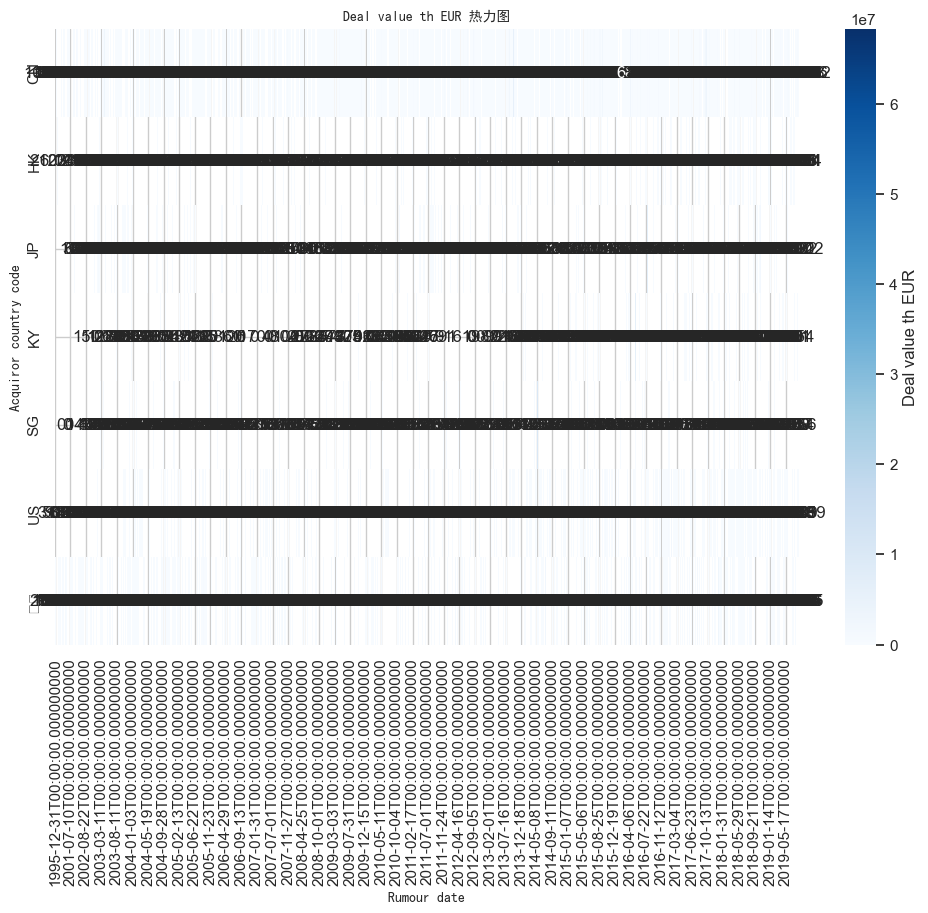

In [17]:
# 设置图形样式
sns.set(style="whitegrid")

# 创建数据透视表，用于制作热力图
heatmap_data = data.pivot_table(values='Deal value th EUR', index='Acquiror country code', columns='Rumour date', aggfunc='sum')

# 画出热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Deal value th EUR'})
plt.title('Deal value th EUR 热力图', fontproperties=font)
plt.xlabel('Rumour date', fontproperties=font)
plt.ylabel('Acquiror country code', fontproperties=font)

plt.show()

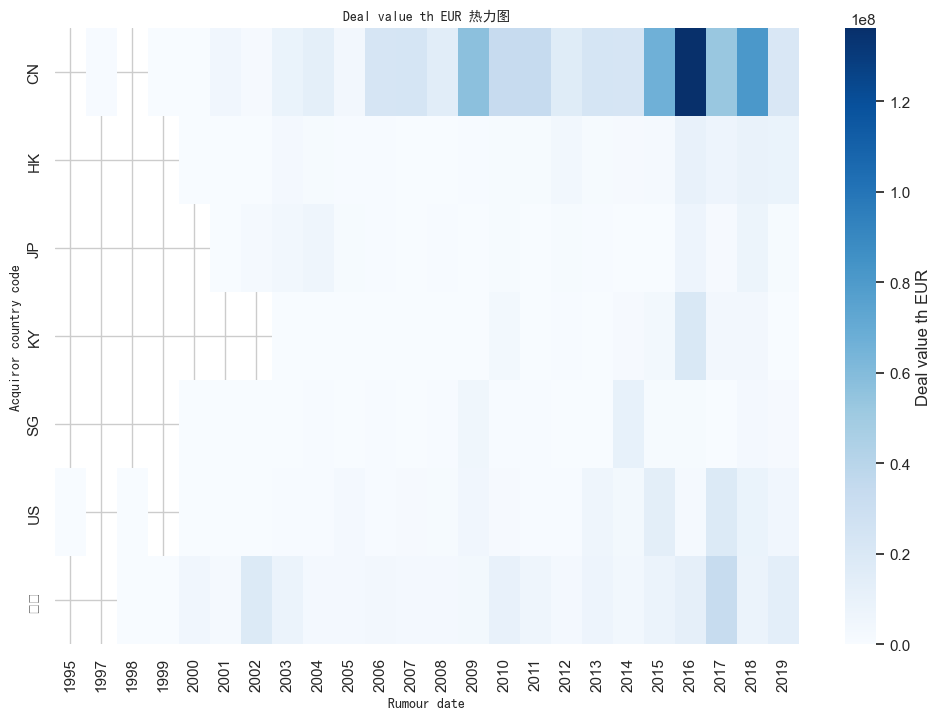

In [18]:
# 将 "Rumour date" 按年分组，并计算每个单位每年的 "Deal value th EUR" 总和
grouped_data = data.groupby([data['Rumour date'].dt.year, 'Acquiror country code'])['Deal value th EUR'].sum().reset_index()

# 创建数据透视表，用于制作热力图
heatmap_data = grouped_data.pivot_table(values='Deal value th EUR', index='Acquiror country code', columns='Rumour date', aggfunc='sum')

# 设置图形样式
sns.set(style="whitegrid")

# 画出热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues',  fmt='.0f', cbar_kws={'label': 'Deal value th EUR'})  #annot=True,
plt.title('Deal value th EUR 热力图', fontproperties=font)
plt.xlabel('Rumour date', fontproperties=font)
plt.ylabel('Acquiror country code', fontproperties=font)

plt.show()

In [19]:
# 添加年度频率的 "Rumour date" 列
data['Rumour year'] = data['Rumour date'].dt.year

# 按照指定维度计算 "Deal value th EUR" 的总和
result = data.groupby(['Acquiror country code', 'Target country code', 'Rumour year'])['Deal value th EUR'].sum().reset_index()

# 打印结果
print(result)

     Acquiror country code Target country code  Rumour year  Deal value th EUR
0                       CN                  AE         2005               0.00
1                       CN                  AE         2006               0.00
2                       CN                  AE         2007               0.00
3                       CN                  AE         2011               0.00
4                       CN                  AE         2015            1891.49
...                    ...                 ...          ...                ...
1821                    其他                  ZM         2003               0.00
1822                    其他                  ZM         2004               0.00
1823                    其他                  ZM         2016               0.00
1824                    其他                  ZW         2006               0.00
1825                    其他                  ZW         2008               0.00

[1826 rows x 4 columns]


C:\Users\Allen\AppData\Local\Temp\ipykernel_2748\2889772019.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label=sankey_data['Acquiror country code'].append(sankey_data['dest']).unique(),


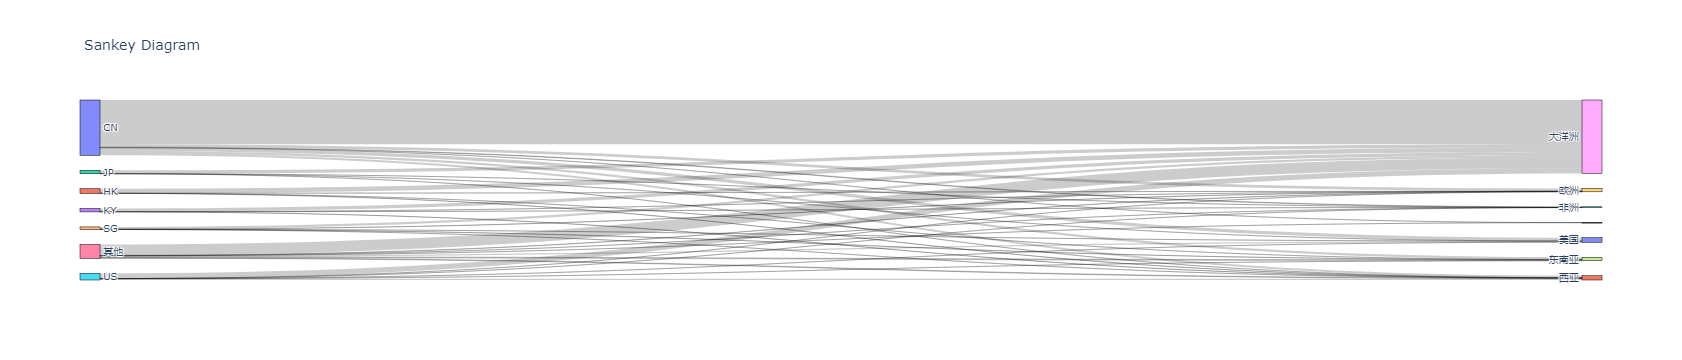

In [20]:
# 自定义函数，将 "Target country code" 映射到指定的地区
def map_to_region(country_code):
    # 根据实际情况补充映射规则
    if country_code in ['US']:
        return '美国'
    elif country_code in ['FR', 'DE', 'GB', 'IT', 'ES']:
        return '欧洲'
    elif country_code in ['AU', 'NZ']:
        return '大洋洲'
    elif country_code in ['SG', 'MY', 'TH', 'ID', 'VN', 'PH']:
        return '东南亚'
    elif country_code in ['SA', 'AE', 'IL']:
        return '西亚'
    elif country_code in ['ZA', 'NG', 'KE']:
        return '非洲'
    else:
        return '其他'

# 创建新的 "dest" 变量
data['dest'] = data['Target country code'].apply(map_to_region)

# 创建一个新的数据框，用于绘制桑基图
sankey_data = data.groupby(['Acquiror country code', 'dest']).agg({'Deal value th EUR': 'sum'}).reset_index()

# 使用plotly创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sankey_data['Acquiror country code'].append(sankey_data['dest']).unique(),
    ),
    link=dict(
        source=sankey_data['Acquiror country code'].map(lambda x: list(sankey_data['Acquiror country code'].unique()).index(x)),
        target=sankey_data['dest'].map(lambda x: len(sankey_data['Acquiror country code'].unique()) + list(sankey_data['dest'].unique()).index(x)),
        value=sankey_data['Deal value th EUR']
    )
)])

# 设置图形布局
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

C:\Users\Allen\AppData\Local\Temp\ipykernel_2748\36876018.py:13: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



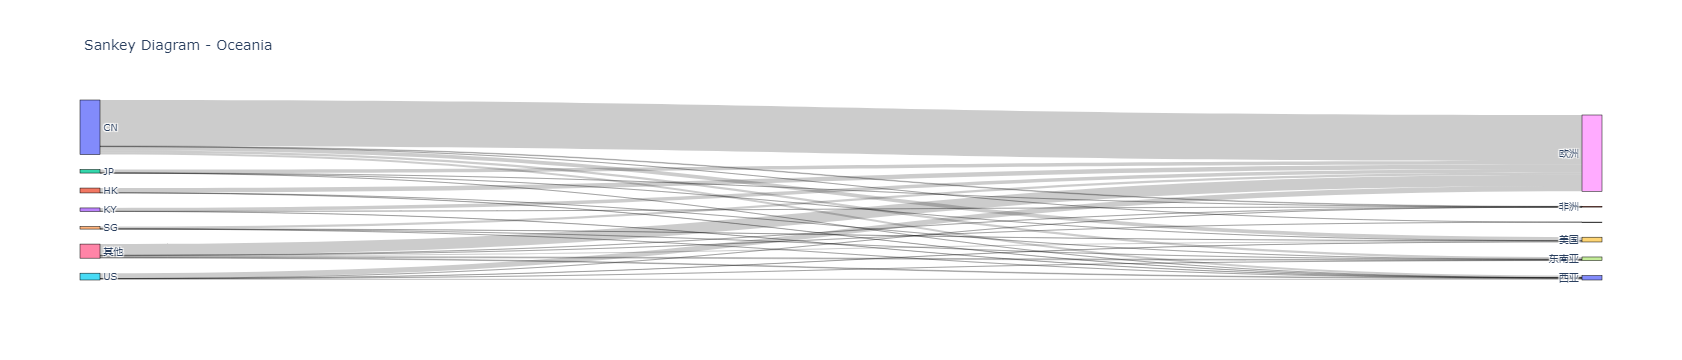

In [21]:
# 提取 "dest" 等于 "大洋洲" 的样本
oceania_data = data[data['dest'] != '大洋洲']

# 创建一个新的数据框，用于绘制桑基图
sankey_data = oceania_data.groupby(['Acquiror country code', 'dest']).agg({'Deal value th EUR': 'sum'}).reset_index()

# 使用plotly创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sankey_data['Acquiror country code'].append(sankey_data['dest']).unique(),
    ),
    link=dict(
        source=sankey_data['Acquiror country code'].map(lambda x: list(sankey_data['Acquiror country code'].unique()).index(x)),
        target=sankey_data['dest'].map(lambda x: len(sankey_data['Acquiror country code'].unique()) + list(sankey_data['dest'].unique()).index(x)),
        value=sankey_data['Deal value th EUR']
    )
)])

# 设置图形布局
fig.update_layout(title_text="Sankey Diagram - Oceania", font_size=10)
fig.show()

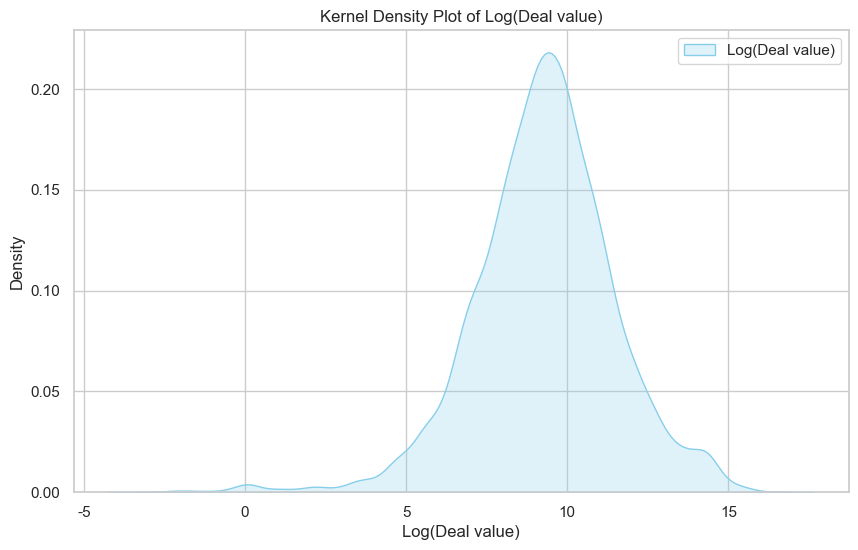

In [26]:
# 对 'Deal value th EUR' 取对数
data['Log_Deal_Value'] = np.log(data['Deal value th EUR'])

# 设置图形风格
sns.set(style="whitegrid")

# 绘制核密度图
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Log_Deal_Value'], fill=True, color='skyblue', label='Log(Deal value)')
plt.title('Kernel Density Plot of Log(Deal value)')
plt.xlabel('Log(Deal value)')
plt.ylabel('Density')
plt.legend()
plt.show()

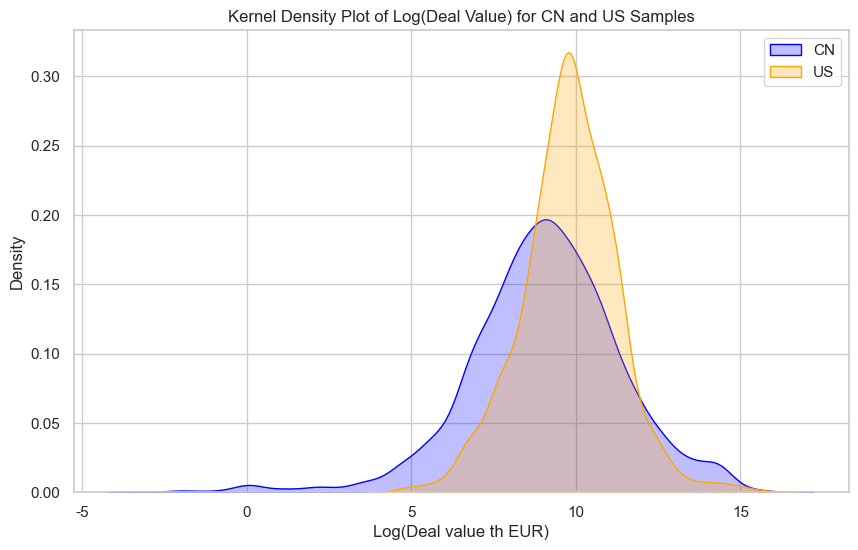

In [28]:
# 提取CN样本和US样本
cn_data = data[data['Acquiror country code'] == 'CN']
us_data = data[data['Acquiror country code'] == 'US']

# 对 'Deal value th EUR' 取对数
data['Log_Deal_Value'] = np.log(data['Deal value th EUR'])

# 设置图形风格
sns.set(style="whitegrid")

# 绘制核密度图
plt.figure(figsize=(10, 6))

# 绘制CN样本的核密度图
sns.kdeplot(cn_data['Log_Deal_Value'], fill=True, label='CN', color='blue')

# 绘制US样本的核密度图
sns.kdeplot(us_data['Log_Deal_Value'], fill=True, label='US', color='orange')

plt.title('Kernel Density Plot of Log(Deal Value) for CN and US Samples')
plt.xlabel('Log(Deal value th EUR)')
plt.ylabel('Density')
plt.legend()
plt.show()

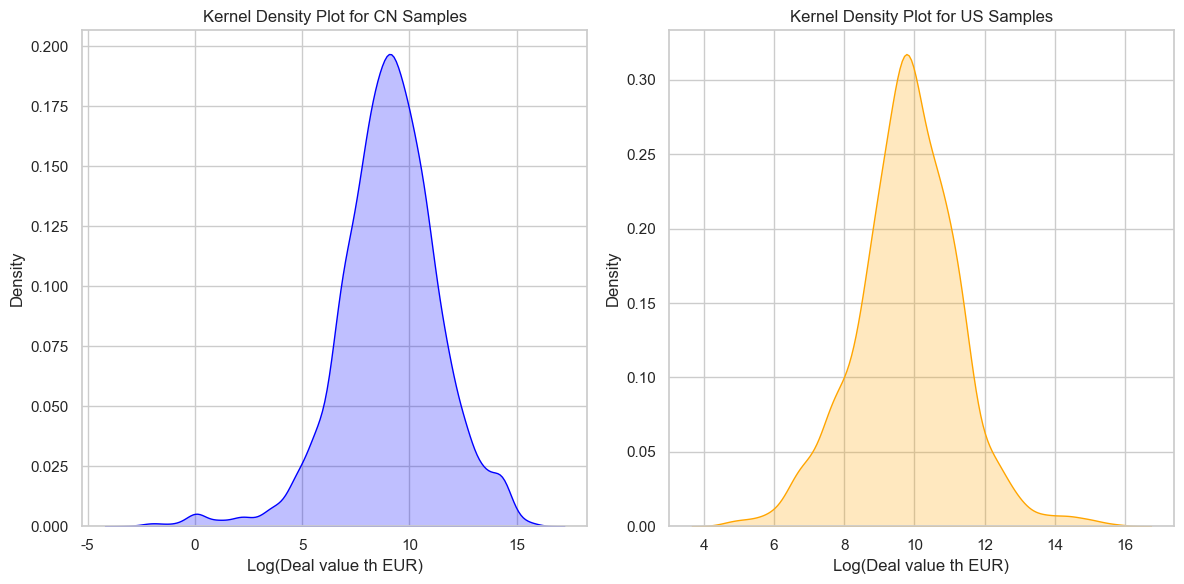

In [29]:
# 提取CN样本和US样本
cn_data = data[data['Acquiror country code'] == 'CN']
us_data = data[data['Acquiror country code'] == 'US']

# 设置图形风格
sns.set(style="whitegrid")

# 创建一个包含两个子图的图形
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制CN样本的核密度图
sns.kdeplot(cn_data['Log_Deal_Value'], fill=True, label='CN', color='blue', ax=axes[0])
axes[0].set_title('Kernel Density Plot for CN Samples')
axes[0].set_xlabel('Log(Deal value th EUR)')
axes[0].set_ylabel('Density')

# 绘制US样本的核密度图
sns.kdeplot(us_data['Log_Deal_Value'], fill=True, label='US', color='orange', ax=axes[1])
axes[1].set_title('Kernel Density Plot for US Samples')
axes[1].set_xlabel('Log(Deal value th EUR)')
axes[1].set_ylabel('Density')

# 调整子图的布局
plt.tight_layout()
plt.show()

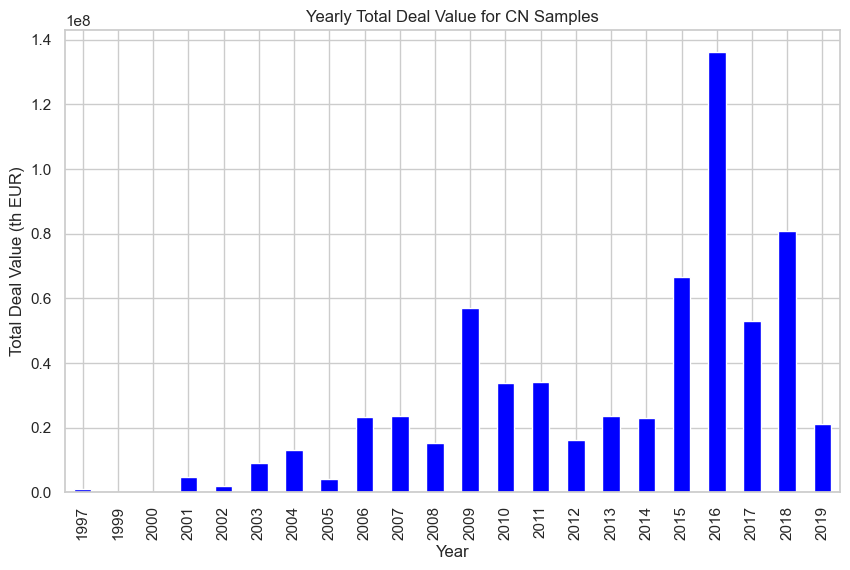

In [30]:
# 选择CN样本
cn_data = data[data['Acquiror country code'] == 'CN']

# 提取年份和对应的 'Deal value th EUR'
cn_yearly_total = cn_data.groupby(cn_data['Rumour date'].dt.year)['Deal value th EUR'].sum()

# 使用matplotlib绘制柱状图
plt.figure(figsize=(10, 6))
cn_yearly_total.plot(kind='bar', color='blue')
plt.title('Yearly Total Deal Value for CN Samples')
plt.xlabel('Year')
plt.ylabel('Total Deal Value (th EUR)')
plt.show()

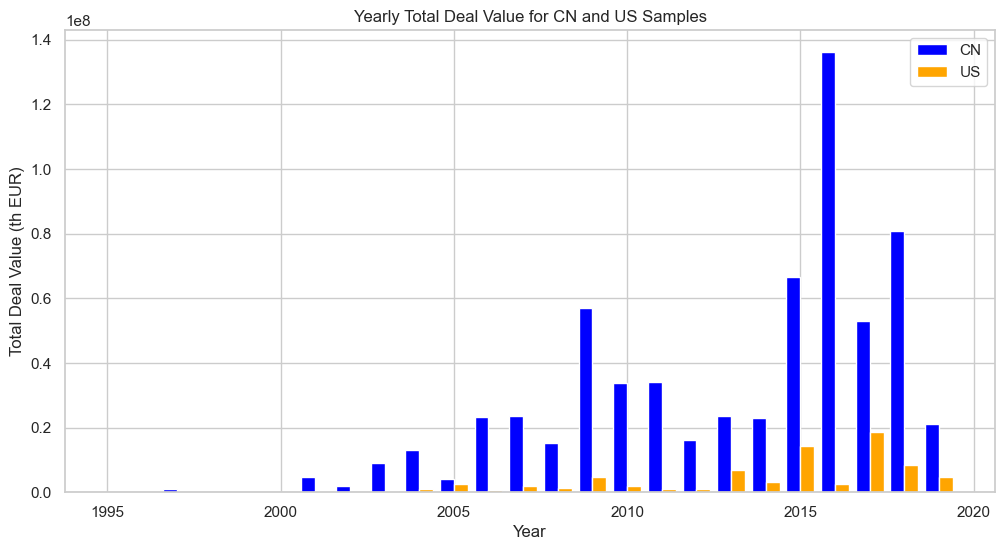

In [31]:
# 分别选择CN样本和US样本
cn_data = data[data['Acquiror country code'] == 'CN']
us_data = data[data['Acquiror country code'] == 'US']

# 提取年份和对应的 'Deal value th EUR'
cn_yearly_total = cn_data.groupby(cn_data['Rumour date'].dt.year)['Deal value th EUR'].sum()
us_yearly_total = us_data.groupby(us_data['Rumour date'].dt.year)['Deal value th EUR'].sum()

# 使用matplotlib绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(cn_yearly_total.index - 0.2, cn_yearly_total.values, width=0.4, color='blue', label='CN')
plt.bar(us_yearly_total.index + 0.2, us_yearly_total.values, width=0.4, color='orange', label='US')

plt.title('Yearly Total Deal Value for CN and US Samples')
plt.xlabel('Year')
plt.ylabel('Total Deal Value (th EUR)')
plt.legend()
plt.show()

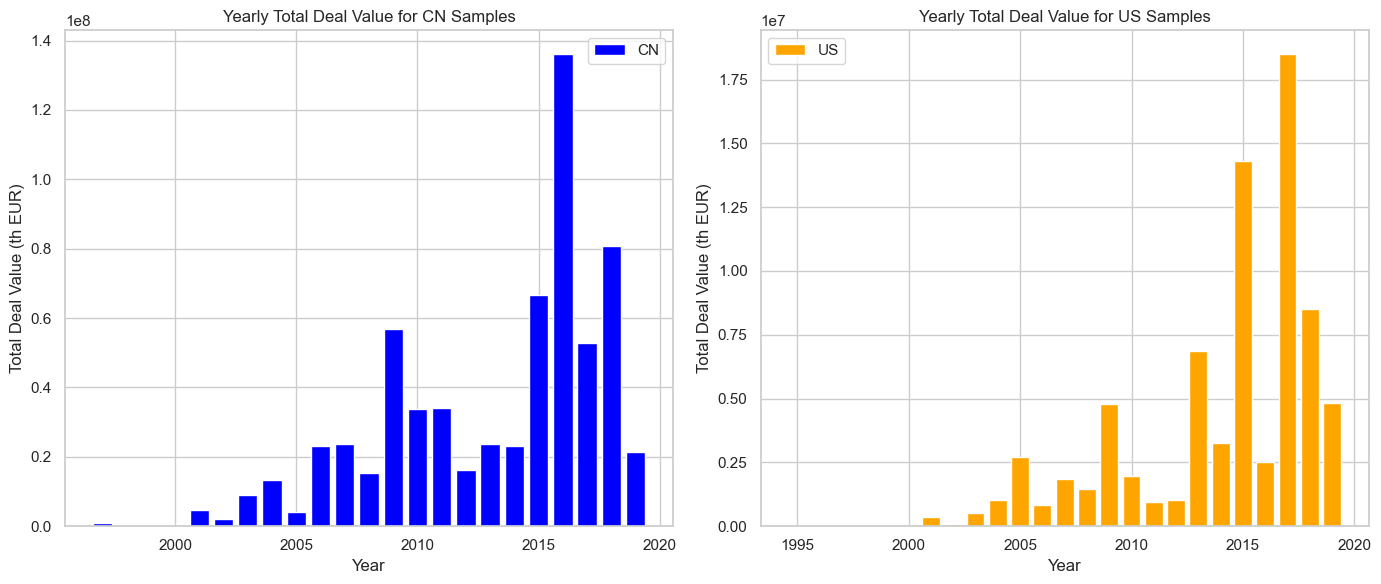

In [32]:
# 分别选择CN样本和US样本
cn_data = data[data['Acquiror country code'] == 'CN']
us_data = data[data['Acquiror country code'] == 'US']

# 提取年份和对应的 'Deal value th EUR'
cn_yearly_total = cn_data.groupby(cn_data['Rumour date'].dt.year)['Deal value th EUR'].sum()
us_yearly_total = us_data.groupby(us_data['Rumour date'].dt.year)['Deal value th EUR'].sum()

# 创建一个包含两个子图的图形
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 在第一个子图上绘制CN样本的柱状图
axes[0].bar(cn_yearly_total.index, cn_yearly_total.values, color='blue', label='CN')
axes[0].set_title('Yearly Total Deal Value for CN Samples')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Deal Value (th EUR)')
axes[0].legend()

# 在第二个子图上绘制US样本的柱状图
axes[1].bar(us_yearly_total.index, us_yearly_total.values, color='orange', label='US')
axes[1].set_title('Yearly Total Deal Value for US Samples')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Deal Value (th EUR)')
axes[1].legend()

# 调整子图的布局
plt.tight_layout()
plt.show()